### SIFT is a feature extraction technique used for keypoint detection and description in computer vision and image processing

In [1]:
import cv2           # OpenCV (Open Source Computer Vision Library) it provides tools for computer vision taskes
                       # includes image and video processing, feature extraction, object detection, machine learning
import os              
from PIL import Image   #python image liberary 
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,log_loss , confusion_matrix ,roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, log_loss
import seaborn as sns

In [2]:
# Write the Path of Your folder which contains Folderes that have images ,each name of these folders acts as the name of class (The images class name)
# Project_datasets here for example contains folders(AA,BB,CC) which contain images , so the first class name is AA for the first images class and BB for the second
class_directory = "C:\\Users\\Abdelrahman tawfik\\Desktop\\jupyter\\ML Project\\Project\\Image_classification and Clustring\\Project_datasets"

sift = cv2.SIFT_create()
all_keypoints = []
all_discriptors = []
all_labels = []
all_images = []
invalid_images_names = []

In [3]:
for class_name in os.listdir(class_directory):                                         #lists all folders in the specified directory. (The Class names)
    class_path = os.path.join(class_directory,class_name)
    for file_name in os.listdir(class_path):                                           #lists all files in the specified directory. (the images)
        if  file_name.endswith((".JPG",".jpg")):
            image_path = os.path.join(class_path,file_name)                            # Construct the full file path (image path)
            image = cv2.imread(image_path)                                             #load the image
            #Input Image (BGR): Each pixel has three values (Blue, Green, Red).
            #Output Image (Grayscale): Each pixel has a single value representing the intensity.
            if image is not None:                                                      #check if the image is loaded 
                gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)                    # Convert the image to grayscal(BGR to(2) grayscal)
                keypoints ,descriptors = sift.detectAndCompute(gray_image, None)       # Detect keypoints and compute the discriptors NONE means keypoint detection is performed over the entire image
                if descriptors is None or keypoints is None:                           # Check if there are None(empty) values in both 
                    print("The image which has neither descriptors or keypoints : ")
                    print("Image keypoints : ",keypoints)
                    print("Image descriptors : ",descriptors)
                    plt.subplot(121), plt.imshow(gray_image),plt.show()
                    invalid_images_names.append(file_name)
                    print("\n")
                else:
                    all_keypoints.append(keypoints)
                    all_discriptors.append(descriptors)
                    label = os.path.basename(os.path.dirname(image_path))  
                    all_labels.append(label)
                    all_images.append(gray_image)
        else:
            invalid_images_names.append(file_name)

In [4]:
print(f"Number of image discriptors : {len(all_discriptors)}")
print(f"Number of image keypoints : {len(all_keypoints)}")
print(f"Number of image labels : {len(all_labels)}")
print(f"Number of Valid image : {len(all_images)}")
print(f"Number of invalid image : {len(invalid_images_names)}")

Number of image discriptors : 3000
Number of image keypoints : 3000
Number of image labels : 3000
Number of Valid image : 3000
Number of invalid image : 0


In [5]:
# Get the invalid images name if there is 
if len(invalid_images_names):
    for i in range(len(invalid_images_names)):
        print(f"Invalid image name {i} : ",invalid_images_names[i],"\n")

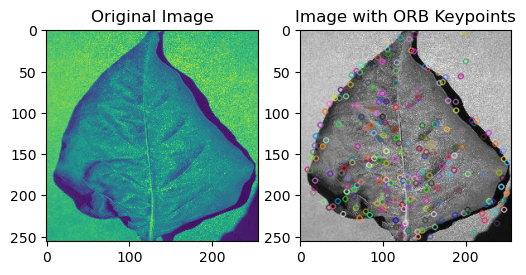

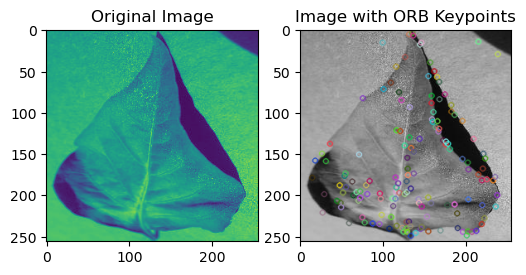

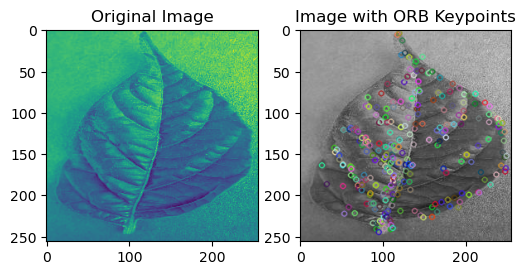

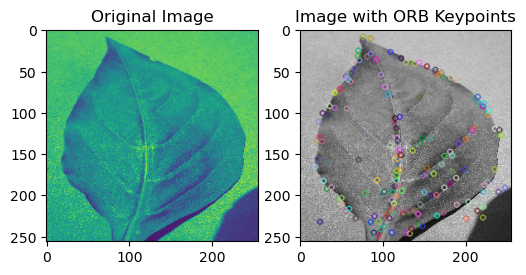

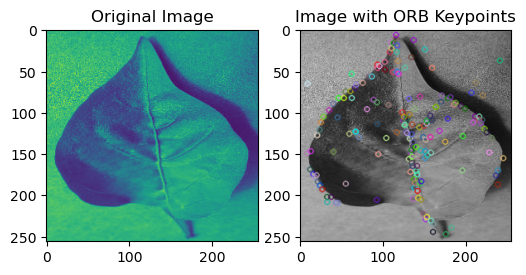

In [22]:
#display the Keypoints on the 5 original images
for i in range (5):
    # Visualize ORB keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(all_images[i], all_keypoints[i], None)
    # Display the keypoints on the original point 
    plt.figure(figsize=(6, 3))
    plt.subplot(121), plt.imshow(all_images[i]), plt.title('Original Image')
    plt.subplot(122), plt.imshow(image_with_keypoints), plt.title('Image with ORB Keypoints')
    plt.show()

In [6]:
# Shuffle the feature and the target
combined_data = list(zip(all_discriptors, all_labels,all_images,all_keypoints))
random.shuffle(combined_data)
shuffled_descriptors, shuffled_labels, shuffled_images, shuffled_keypoints = zip(*combined_data)

    Class : Potato___Early_blight


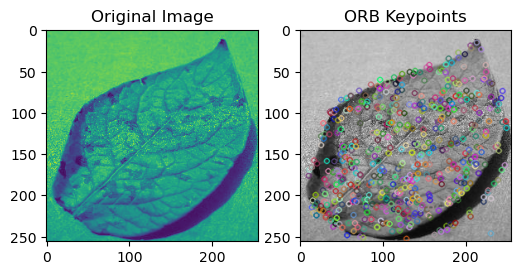

    Class : Potato___Early_blight


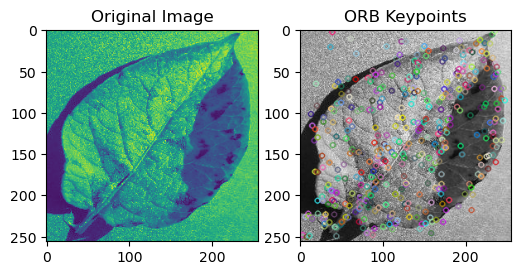

    Class : Potato___Early_blight


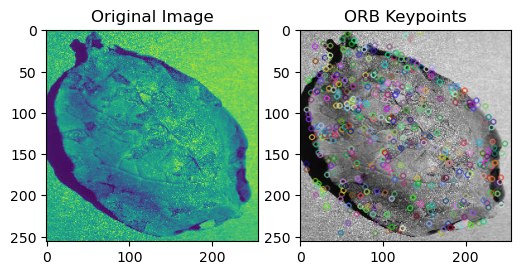

    Class : Potato___Early_blight


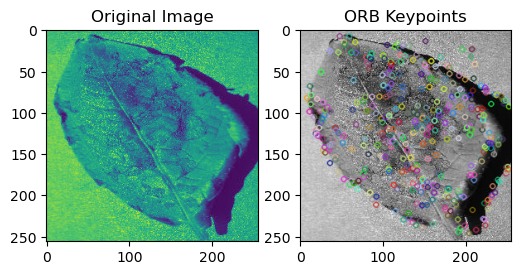

    Class : Tomato__Tomato_YellowLeaf__Curl_Virus


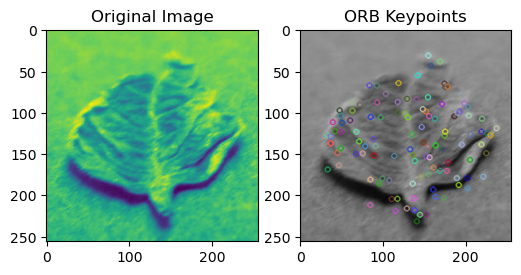

In [23]:
#display the Keypoints on the first 5 original images after shuffling 
for i in range (5):
    # Visualize ORB keypoints on the image
    image_with_keypoints2 = cv2.drawKeypoints(shuffled_images[i], shuffled_keypoints[i], None)
    print(f"    Class : {shuffled_labels[i]}")                                                   # display it's label(class)
    plt.figure(figsize=(6, 3))                                                                   # Drow them
    plt.subplot(121), plt.imshow(shuffled_images[i]), plt.title('Original Image')
    plt.subplot(122), plt.imshow(image_with_keypoints2), plt.title('ORB Keypoints')
    plt.show()

In [24]:
# To check if all the image has it's True Keypoints and label
print(f"Number of image discriptors : {len(shuffled_descriptors)}")
print(f"Number of image keypoints : {len(shuffled_keypoints)}")
print(f"Number of image labels : {len(shuffled_labels)}")
print(f"Number of Valid image : {len(shuffled_images)}")

Number of image discriptors : 3000
Number of image keypoints : 3000
Number of image labels : 3000
Number of Valid image : 3000


In [8]:
# Convert the labels to numerical values
label_mapping = {label: i for i, label in enumerate(np.unique(shuffled_labels))}
all_labels_numeric = np.array([label_mapping[label] for label in shuffled_labels])

In [ ]:
# Pad all_descriptors to a fixed lenght
padded_discriptors=pad_sequences(shuffled_descriptors, maxlen=750, padding='post' ,truncating='post' ,dtype= 'float32' )

In [9]:
# Is using NumPy's reshape function to transform a multi-dimensional array into a two-dimensional array 
# Multi_demensional (which gonna be converted) is assumed to be a multi-dimensional NumPy array to success the conversion 
flattened_discriptors = padded_discriptors.reshape((len(padded_discriptors), -1))     #This tuple specifies the target shape of the array in the first dimension and the second
# -1 it means that the size of that dimension (second dimension) is inferred based on the size of the array and the other specified dimensions

In [ ]:
# To checik if the number of flattened discriptors is the same of the number of shuffled descriptors
print(f"Number of flattened discriptors : {len(flattened_discriptors)}")

In [10]:
# Convert the all_descriptors list to numpy array 
X = np.array(flattened_discriptors)                       #To covert it must all the dimensions has the same sizeeeeeeeeee  {ERROR}
y = all_labels_numeric

In [11]:
# Check if each feature has it's label(Target)
print(f"Size of test dataset : {len(X)}")
print(f"Size of labels(Targets) : {len(y)}")

Size of test dataset : 3000
Size of labels(Targets) : 3000


In [12]:
# Split Test and Target Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the Feature to small scall to improve the performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Intialize the model
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs' ,max_iter=2000)

In [15]:
# Train the model
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [16]:
# Check the number of iterations in order to achieve conversion in training phase
print("Convergence number:", logistic.n_iter_)                

Convergence number: [177]


In [17]:
# test the model to calculate the accuracy
y_pred = logistic.predict(X_test)
y_pred_proba = logistic.predict_proba(X_test)       #generate the predicted probabilities for each class (or label) for each sample

In [18]:
# Calculate the accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy : {accuracy}")

The accuracy : 0.945


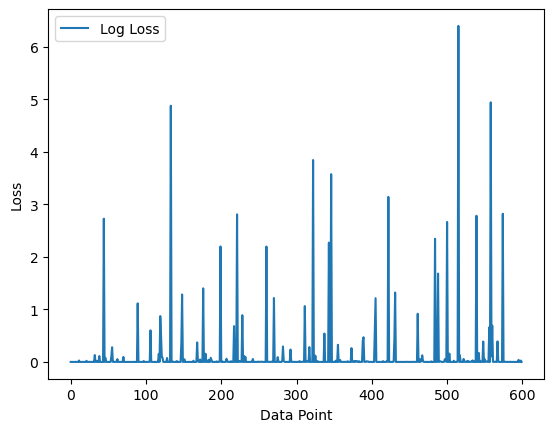

In [19]:
# Calculate log loss 
loss_values = []
for i in range(len(y_test)):
    true_label = np.zeros(len(label_mapping))
    true_label[y_test[i]] = 1
    loss = log_loss(true_label, y_pred_proba[i])
    loss_values.append(loss)

# Plotting the loss curve
plt.plot(loss_values, label='Log Loss')
plt.xlabel('Data Point')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Loss curve referred to as the training loss curve (loss function) and The goal during training is to minimize this loss J(O)

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[182   5  10]
 [  4 187   2]
 [  4   8 198]]


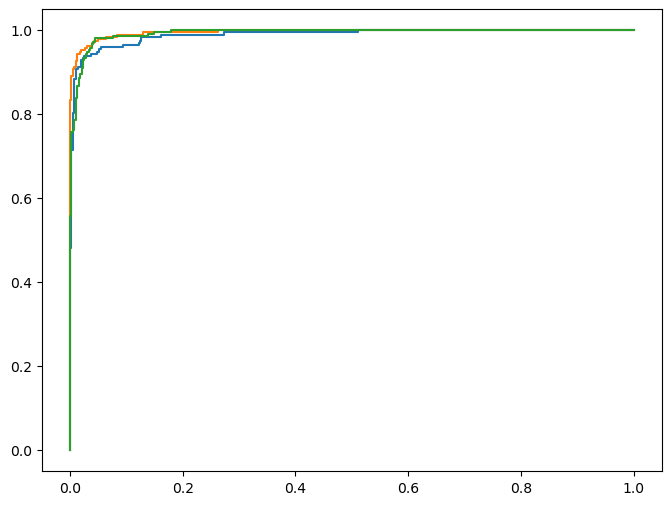

In [21]:
# Binarize the labels for the ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))                  #is used to convert the true labels into binary format for the ROC curve.
# Compute ROC curve and ROC area for each class
#plots the True Positive Rate (sensitivity) against the False Positive Rate (1 - specificity) for various threshold values.
# Threshold values convert the continuous probability scores produced by a model into binary predictions. In the context of a binary classification problem, these probability scores can be compared to a threshold to determine the predicted class.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])          # Roc_curve computes the ROC curve for each class.
    roc_auc[i] = auc(fpr[i], tpr[i])                                             # Auc  calculates the area under the ROC curve for each class

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')